<a href="https://colab.research.google.com/github/RiskyDwiRamadhan/PCVK_GENAP_2022/blob/main/Week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Melakukan import beberapa library yang dibutuhkan
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Meminta izin untuk mengakses drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## ORB Descriptor

In [3]:
def display(img, cmap='gray'):
  fig = plt.figure(figsize=(12,10))
  ax = fig.add_subplot(111)
  ax.imshow(img,cmap='gray')

TypeError: ignored

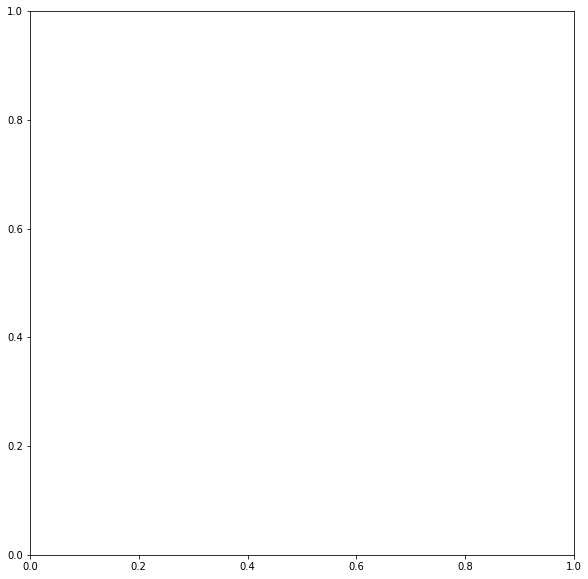

In [5]:
reeses = cv.imread('/PCVK/Pertemuan12/reeses_puffs.png', 0)
display(reeses)

In [ ]:
cereals = cv.imread('/PCVK/Pertemuan_12/many_cereals.jpg', 0)
display(cereals)

In [ ]:
orb = cv.ORB_create()
kp1,des1 = orb.detectAndCompute(reeses, None)
kp2,des2 = orb.detectAndCompute(cereals, None)
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck = True)
matches = bf.match(des1,des2)
single_match = matches[0]
single_match.distance

In [ ]:
len(matches)

In [ ]:
from sys import flags
matches = sorted(matches, key=lambda x:x.distance)
reeses_match = cv.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None, flags=2)
display(reeses_match)

# SIFT DEscriptor

In [ ]:
!pip install opencv-contrib-python==4.4.0.44

In [ ]:
sift = cv.xfeatures2d.SIFT_create()
kp1,des1 = sift.detectAndCompute(reeses, None)
kp2,des2 = sift.detectAndCompute(cereals, None)
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

good = []

# Makin kecil jarak makin cocok
# Ratio match1 < 75% Match2
for match1, match2 in matches:
  #jika jarak match 1 lebih kecil dari jarak 75% match2 descriptor disimpan
  if match1.distance < 0.75*match2.distance:
    good.append([match1])

len(good)

In [ ]:
len(matches)

In [ ]:
sift_matches = cv.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags=2)
display(sift_matches)

# Face Detection

In [ ]:
cascade_wajah = cv.CascadeClassifier('/PCVK/Pertemuan_12/haarcascade_frontalface_alt2.xml')
jokowi = cv.imread('/PCVK/Pertemuan_12/jokowi.jpg',0)
roi_wajah = cascade_wajah.detectMultiScale(jokowi)
for(x,y,w,h) in roi_wajah:
 cv.rectangle(jokowi,(x,y),(x+w,y+h),(255,255,255),3)
plt.figure(figsize = (10,10))
plt.imshow(jokowi, cmap='gray')

# TUGAS PRAKTIKUM

In [ ]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import PIL
import io
import html
import time

In [ ]:
# Melakukan pengambilan gambar pada drive yang simpan pada 2 varibel untuk setiap gambarnya
jokowi_1 = cv2.imread('/PCVK/Pertemuan_12/jokowi.jpg')
jokowi_2 = cv2.imread('/PCVK/Pertemuan_12/jokowi.jpg')

kartini_1 = cv2.imread('/PCVK/Pertemuan_12/kartini.jpg')
kartini_2 = cv2.imread('/PCVK/Pertemuan_12/kartini.jpg')

kucing_1 = cv2.imread('/PCVK/Pertemuan_12/kucing.jpg')
kucing_2 = cv2.imread('/PCVK/Pertemuan_12/kucing.jpg')

mask_1 = cv2.imread('/PCVK/Pertemuan_12/mask.png')
mask_2 = cv2.imread('/PCVK/Pertemuan_12/mask.png')

mjordan_1 = cv2.imread('/PCVK/Pertemuan_12/mjordan.jpg')
mjordan_2 = cv2.imread('/PCVK/Pertemuan_12/mjordan.jpg')

solvayconf_1 = cv2.imread('/PCVK/Pertemuan_12/solvayconf.jpg')
solvayconf_2 = cv2.imread('/PCVK/Pertemuan_12/solvayconf.jpg')

def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
def faceCascadeFunction(image, thickness):
  faces_rects = faceCascade.detectMultiScale(image, scaleFactor = 1.2, minNeighbors = 5);
  for (x,y,w,h) in faces_rects:
      cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), thickness)

# Gambar Jokowi
faceCascadeFunction(jokowi_2, 5)
# Gambar Kartini
faceCascadeFunction(kartini_2, 5)
# Gambar Kucing
faceCascadeFunction(kucing_2, 5)
# Gambar Mask
faceCascadeFunction(mask_2, 5)
# Gambar Mjordan
faceCascadeFunction(mjordan_2, 3)
# Gambar Solvayconf
faceCascadeFunction(solvayconf_2, 3)

f, axarr = plt. subplots(6,2,figsize=(15,10)) # Untuk mengatur tabel dan ukuran gambar yang akan ditampilkan

# Menampilkan setiap gambar
plt.subplot(321),plt.imshow(convertToRGB(jokowi_1))
plt.subplot(322),plt.imshow(convertToRGB(jokowi_2))

plt.subplot(323),plt.imshow(convertToRGB(kartini_1))
plt.subplot(324),plt.imshow(convertToRGB(kartini_2))

plt.subplot(325),plt.imshow(convertToRGB(kucing_1))
plt.subplot(326),plt.imshow(convertToRGB(kucing_2))

f, axarr = plt. subplots(6,2,figsize=(15,10))
plt.subplot(321),plt.imshow(convertToRGB(mask_1))
plt.subplot(322),plt.imshow(convertToRGB(mask_2))

plt.subplot(323),plt.imshow(convertToRGB(mjordan_1))
plt.subplot(324),plt.imshow(convertToRGB(mjordan_2))

plt.subplot(325),plt.imshow(convertToRGB(solvayconf_1))
plt.subplot(326),plt.imshow(convertToRGB(solvayconf_2))

In [ ]:
jokowi = cv2.imread('/PCVK/Pertemuan_12/jokowi.jpg')
jokowi_rgb = convertToRGB(jokowi)
jokowi_fd = jokowi_rgb.copy()

kartini = cv2.imread('/PCVK/Pertemuan_12/kartini.jpg',0)
kartini_rgb = convertToRGB(kartini)
kartini_fd = kartini_rgb.copy()

kucing = cv2.imread('/PCVK/Pertemuan_12/kucing.jpg',0)
kucing_rgb = convertToRGB(kucing)
kucing_fd = kucing_rgb.copy()

mask = cv2.imread('/PCVK/Pertemuan_12/mask.png',0)
mask_rgb = convertToRGB(mask)
mask_fd = mask_rgb.copy()

mjordan = cv2.imread('/PCVK/Pertemuan_12/mjordan.jpg',0)
mjordan_rgb = convertToRGB(mjordan)
mjordan_fd = mjordan_rgb.copy()

solvayconf = cv2.imread('/PCVK/Pertemuan_12/solvayconf.jpg',0)
solvayconf_rgb = convertToRGB(solvayconf)
solvayconf_fd = solvayconf_rgb.copy()

cascade_wajah = cv2.CascadeClassifier('/PCVK/Pertemuan_12/haarcascade_frontalface_alt2.xml')
def newFaceCascadeFunction(image_rgb, image):
  fd_image = cascade_wajah.detectMultiScale(image)
  for(x,y,w,h) in fd_image:
    cv2.rectangle(image, (x,y),(x+w,y+h), (0,255,0), 3)
  plt.figure(figsize = (10,10))
  f, axarr = plt. subplots(1,2,figsize=(8,8))
  plt.subplot(121),plt.imshow(image_rgb)
  plt.subplot(122),plt.imshow(image)
  plt.show()

# Gambar Jokowi
newFaceCascadeFunction(jokowi_rgb, jokowi_fd)
# Gambar Kartini
newFaceCascadeFunction(kartini_rgb, kartini_fd)
# Gambar Kucing
newFaceCascadeFunction(kucing_rgb, kucing_fd)
# Gambar Mask
newFaceCascadeFunction(mask_rgb, mask_fd)
# Gambar Mjordan
newFaceCascadeFunction(mjordan_rgb, mjordan_fd)
# Gambar Solvayconf
newFaceCascadeFunction(solvayconf_rgb, solvayconf_fd) 

In [ ]:
cascade_wajah = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalcatface.xml")

kucing = cv2.imread('/PCVK/Pertemuan_12/kucing.jpg', 0)
kucing_ori = cv2.imread('/PCVK/Pertemuan_12/kucing.jpg', 0)

roi_wajah = cascade_wajah.detectMultiScale(kucing_ori)
for (x,y,w,h) in roi_wajah: 
  cv2.rectangle(kucing_ori,(x,y),(x+w,y+h),(0,255,0),3) 
plt.figure(figsize = (10,10))

f, axarr = plt. subplots(1,2,figsize=(15,5))
plt.subplot(121),plt.imshow(kucing, cmap='gray')
plt.subplot(122),plt.imshow(kucing_ori, cmap='gray')
plt.show()

In [ ]:
cascade_wajah = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")

jokowi = cv2.imread('/PCVK/Pertemuan_12/jokowi.jpg')
jokowi_ori = cv2.imread('/PCVK/Pertemuan_12/jokowi.jpg')
jokowi_gray = cv2.cvtColor(jokowi, cv2.COLOR_BGR2GRAY)
jokowi_ori_gray = cv2.cvtColor(jokowi_ori, cv2.COLOR_BGR2GRAY)

roi_wajah = cascade_wajah.detectMultiScale(jokowi_gray)
for (x,y,w,h) in roi_wajah: 
  cv2.rectangle(jokowi_gray,(x,y),(x+w,y+h),(255,255,255),3)

# Plot outputs
f, axarr = plt. subplots(1,2,figsize=(15,15))
plt.subplot(121),plt.imshow(jokowi_ori_gray, cmap='gray')
plt.subplot(122),plt.imshow(jokowi_gray, cmap='gray')
plt.show()

In [ ]:
def js_to_image(js_reply):
  image_bytes = b64decode(js_reply.split(',')[1])
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img


def bbox_to_bytes(bbox_array):
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  bbox_PIL.save(iobuf, format='png')
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64decode(iobuf.getvalue()), 'utf-8')))
  
  return bbox_to_bytes

face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality){
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  data = eval_js('takePhoto({})'.format(quality))
  img = js_to_image(data)
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  faces = face_cascade.detectMultiScale(gray)
  for(x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255, 0, 0),2)

  cv2.imwrite(filename, img)

  return filename

In [ ]:
try:
  filename = take_photo('photo1.jpg')
  print('Saved to {}'.format(filename))

  display(Image(filename))
except Exception as err:
  print(str(err))

In [ ]:
image = cv2.imread('/PCVK/Pertemuan_12/mjordan.jpg') 
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # konvert gambar menjadi abu-abu
figure_size = 9 # the dimension of the x and y axis of the kernal.

new_image = cv2.medianBlur(image, figure_size)
f, axarr = plt. subplots(1,2,figsize=(15,15))
plt.subplot(121), plt.imshow(image, cmap='gray'),plt.title('Original')
plt.subplot(122), plt.imshow(new_image, cmap='gray'),plt.title('Median Filter')
plt.show()